# Assignment - I

## Group Member Names

- Akhila Guttikonda
- Sai Bhargav Tetali
- Shubhada Kapre
- Soumith Reddy Palreddy
- Srividya Rayaprolu

In [3]:
from pandas import Series, DataFrame
import pandas as pd
import re
%pylab inline

from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize

#run on collab only
#nltk.download('stopwords')
#nltk.download('punkt')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Scraping

Scraping is done from page 11 on the Edmunds forum until more than 5000 comments have been scraped

In [6]:
#run on collab only
#!pip install selenium
#!apt-get update 
#!apt install chromium-chromedriver

from selenium import webdriver
from selenium.webdriver.common.by import By
chrome_options = webdriver.ChromeOptions()

#run on collab only
#chrome_options.add_argument('--headless')
#chrome_options.add_argument('--no-sandbox')
#chrome_options.add_argument('--disable-dev-shm-usage')

path = '/Users/saibhargavtetali/chromedriver'
driver = webdriver.Chrome(path,options=chrome_options)
url = "https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p11"
driver.get(url)

df = pd.DataFrame(columns = ['Date','Text']) 
while len(df) <= 5000:

    user_message = driver.find_elements(By.CLASS_NAME,'Comment')

    for i in user_message:
        comment = i.find_element(By.CLASS_NAME,'Message.userContent').text
        # Message.userContent is used for 'Message userContent' class which has the just the comment ignoring sub-classes
        # like signatures
        date = i.find_element(By.TAG_NAME,'time').text
        df.loc[len(df.index)] = [date, comment]

    # code to go to the next page
    button = driver.find_element("link text", "»")
    button.click()
    
df

,Date,Text
0,January 2004,Don't you think people see their car as projec...
1,January 2004,I dont know about that...we just all want the ...
2,January 2004,"""way more than we are paying for entry lux sed..."
3,January 2004,One friend of mine owns 11 car dealerships and...
4,January 2004,"""It can go either way ""\n\nIt goes all differe..."
...,...,...
5045,August 2006,"Hmmm, maybe it's time for a poll.\n\nQuestions..."
5046,August 2006,"I'll start:\n\n1) No, it's too small.\n2) Nope..."
5047,August 2006,Yeah pat but only NA and Japan get the IS350.
5048,August 2006,The CAMRY aka ES350 does not belong in this di...


In [7]:
# code to connect google drive with collab
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
#storing scraped data to Comments.csv as scraping takes time. 
#Use that file to rerun below codes. Other users can mention thier respective paths
df.to_csv('Comments.csv')

## Stopwords removal function

In [9]:
stop_words = set(stopwords.words('english'))

# this function is to create a new column of text by removing stopwords

def remstopwords(x):
    text_tokens = word_tokenize(x)
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
    return (" ").join(tokens_without_sw)

## Scraped data read-in

In [10]:
# incase of reproducing, do not need to run the scraping data code. We can directly use 
df = pd.read_csv('Comments.csv')
df = df.drop(columns = ['Unnamed: 0'])
df.dropna(inplace = True)

#cleaning text by removing punctuation, converting to lower case and replacing \n with space

df['Text'] = df['Text'].map(lambda x: re.sub(r'[^\w\s]', '', x.lower().replace("\n", " ")))

df[:10]

,Date,Text
0,January 2004,dont you think people see their car as project...
1,January 2004,i dont know about thatwe just all want the big...
2,January 2004,way more than we are paying for entry lux seda...
3,January 2004,one friend of mine owns 11 car dealerships and...
4,January 2004,it can go either way it goes all different w...
5,January 2004,i too thought i wanted a bmw but bounced on th...
6,January 2004,dont you think people see their car as project...
7,January 2004,i hate what my bmw represents to too many peop...
8,January 2004,kd you are right as always different strokes f...
9,January 2004,kdyou got to get rid of your 10 year old hyund...


In [11]:
# this function returns the actual frequency of words (multiple repetitions of a word are counted multiple times)

def freq(Series):
    
    # splitting each comment into a list of words
    y = Series.map(lambda x: x.lstrip('"').rstrip('"').split())
    
    words_mainlist = []
    wordsets_list = list(y)
    freq_dict = {}
    
    for i in range (len(wordsets_list)): # iterating over comment
        for j in range(len(wordsets_list[i])): # iterating over each word
            if wordsets_list[i][j] in freq_dict:
                freq_dict[wordsets_list[i][j]] = freq_dict[wordsets_list[i][j]] + 1
            else:
                freq_dict[wordsets_list[i][j]] = 1

    freq = pd.DataFrame(list(freq_dict.items()),columns = ['word','count'])
    freq.set_index('word', inplace = True)
    return freq

In [12]:
# Applying the above freq function on Text column which has stopwords.

df_freq = freq(df['Text']).sort_values(by = 'count', ascending = False)
df_freq.insert(0, 'Rank', range(1, 1 + len(df_freq)))
df_freq

,Rank,count
word,,
the,1,26184
a,2,12160
i,3,10455
and,4,10288
to,5,9750
...,...,...
stylingdesign,20571,1
timelessly,20572,1
356,20573,1


In [13]:
# storing the word frequencies to excel as backup.
df_freq.to_csv('Word_freq.csv')

## Task A: Zipf's Law 

Text(0, 0.5, 'log(Rank)')

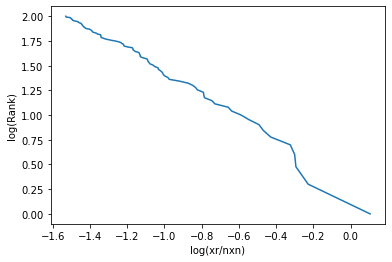

In [14]:
nxn = df_freq.iloc[len(df_freq)-1]['Rank'] # getting the rank of the lowest frequency word.
df_freq['log(xr/nxn)'] = np.log10(df_freq['count']/nxn) # creating a column by dividing frequency of a word with nxn and taking log
df_freq['log(Rank)'] = np.log10(df_freq['Rank']) # creating a column with log of rank
plot(df_freq['log(xr/nxn)'][:100],df_freq['log(Rank)'][:100]) # the plot should be approximately a straight line
xlabel('log(xr/nxn)')
ylabel('log(Rank)')

The plot for logarithm shows straight line which satisfies the equation:

$log(Rank) = \theta .log(\dfrac{x_r}{nx_n}) + \epsilon$  ($\theta \approx -1 $)

In [40]:
# cross-checking the value of theta using linear regression
from sklearn import linear_model
from patsy import dmatrices
Y, X = dmatrices('log(Rank) ~ 0 + Q("log(xr/nxn)")',
                 df_freq,return_type="dataframe")
y = Y['log(Rank)'].values

model = linear_model.LinearRegression()
model.fit(X, y)
print('The slope of the line for equation log(rank) = theta * log(xr/nxn) is theta = ',model.coef_[0])

The slope of the line for equation log(rank) = theta * log(xr/nxn) is theta =  -1.6676311898243101


Text(0, 0.5, 'Rank')

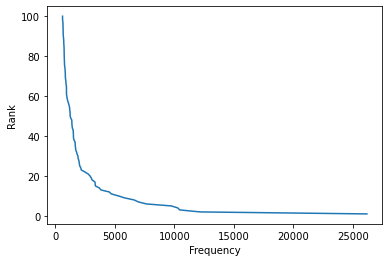

In [15]:
#visualising hockey stick shape (Zipf's Law) for the top 100 words
plot(df_freq['count'][:100],df_freq['Rank'][:100])
xlabel('Frequency')
ylabel('Rank')

# Lift Values Calculation

## Replacing car models with brands and removing stopwords

In [18]:
# This code block takes time around half an hour

# taking file with models and brands as input which will be used to replace models woth brands.
df_replace = pd.read_csv('car models and brands (3).csv')

# function to replace models with brands
def replace(x):
    for i in range(len(df_replace)):
        x = x.replace(df_replace.iloc[i]['Model'],df_replace.iloc[i]['Brand'])
        
    return x
        
# remstopwords - function to remove stopwords is above.
# Creating another column Text_clean with stopwords removed and models replaced with brands. The file with car
# models and brands needs to be updated.

df['Text_clean'] = df['Text'].map(remstopwords).map(replace)
#df_sample['Text_clean'] = df_sample['Text'].map(remstopwords).map(replace)
#df_sample[:10]
df[:10]

,Date,Text,Text_clean
0,January 2004,dont you think people see their car as project...,car projecting lot life disconnect philosophy ...
1,January 2004,i dont know about thatwe just all want the big...,thatwe biggest brag biggest baddest car paying...
2,January 2004,way more than we are paying for entry lux seda...,paying entry lux sedan spent millionares truei...
3,January 2004,one friend of mine owns 11 car dealerships and...,friend owns 11 car dealerships bank wealthy dr...
4,January 2004,it can go either way it goes all different w...,different ways time wanted bmw longest time fi...
5,January 2004,i too thought i wanted a bmw but bounced on th...,wanted bmw bounced price lack lsd 330 easily d...
6,January 2004,dont you think people see their car as project...,car projecting lot life disconnect philosophy ...
7,January 2004,i hate what my bmw represents to too many peop...,hate bmw represents lets extend concept hate r...
8,January 2004,kd you are right as always different strokes f...,kd different strokes different folks different...
9,January 2004,kdyou got to get rid of your 10 year old hyund...,kdyou rid 10 year hyundai cheap unreliable uns...


## Task B: Unique Frequency Calculation

In [20]:
# this function returns the unique frequency of words(multiple repetitions of a word in a comment are counted as one)

def unique_freq(Series):
    
    y = Series.map(lambda x: list(set(x.lstrip('"').rstrip('"').split())))

    wordlists_list = list(y)
    freq_dict = {}
    for i in range (len(wordlists_list)):
        for j in range(len(wordlists_list[i])):
            if wordlists_list[i][j] in freq_dict:
                freq_dict[wordlists_list[i][j]] = freq_dict[wordlists_list[i][j]] + 1
            else:
                freq_dict[wordlists_list[i][j]] = 1

    uniq_freq = pd.DataFrame(list(freq_dict.items()),columns = ['word','count']).set_index('word')
    return uniq_freq

In [22]:
# using above function to get unique word frequencies on Text_clean which has no stopwords and models replaced with
#brands. This result can be used to determine our top 10 brands.

df_unique_freq = unique_freq(df['Text_clean']).sort_values(by = 'count', ascending = False)
df_unique_freq.to_csv('Unique_Word_freq.csv')
df_unique_freq

,count
word,
car,2526
bmw,1907
acura,1229
pontiac,810
drive,728
...,...
ghetto,1
lusting,1
boringexcept,1


In [23]:
# storing the word unique frequencies to excel as backup.

df_unique_freq = pd.read_csv('Unique_Word_freq.csv')
df_unique_freq.set_index('word', inplace = True)
df_unique_freq

,count
word,
car,2526
bmw,1907
acura,1229
pontiac,810
drive,728
...,...
ghetto,1
lusting,1
boringexcept,1


## Lift function 

In [24]:
# This function takes a string, a list, dataframe from which a column with comments is specified and freq_series which has 
# the word unique frequencies and returns lift values of the string with all the values present in the list

def lift(string, string_list,dataf,column,freq_series):
    nrows = float(len(dataf))
    string_n = float(freq_series.loc[string])
    string_mask = dataf[column].str.contains(string)
    lift_list = []
    for items in string_list:
        if string == items:
            lift_list.append('NA')
        else:
            string_list_n = float(freq_series.loc[items])
            mel_count = float(dataf[string_mask][column].str.contains(items).sum())
            lift = (nrows * mel_count)/(string_n * string_list_n)
            lift_list.append(lift)
    
    return lift_list

## Task C: Lift values for top 10 brands

In [25]:
brand_list = ['bmw','acura','pontiac','lexus','toyota','audi','infiniti','nissan','volkswagen','mercedes']

lift_dict = {}
for i in range(len(brand_list)):
    lift_dict[brand_list[i]] = lift(brand_list[i], brand_list,df,'Text_clean',df_unique_freq)

brands_lift = pd.DataFrame.from_dict(lift_dict)
brands_lift.index = brand_list
brands_lift

,bmw,acura,pontiac,lexus,toyota,audi,infiniti,nissan,volkswagen,mercedes
bmw,NA,1.833964,1.83661,1.912115,3.36458,2.01416,2.029449,1.495508,2.014002,3.792104
acura,1.833964,NA,2.799191,2.281136,5.051727,2.552502,2.641805,2.676442,2.275045,5.352015
pontiac,1.83661,2.799191,NA,1.888918,3.926914,2.104158,3.46323,2.872887,2.38977,4.463915
lexus,1.912115,2.281136,1.888918,NA,4.451729,2.672197,3.518327,1.717841,2.290455,6.154504
toyota,3.36458,5.051727,3.926914,4.451729,NA,4.52762,4.084884,5.389386,5.465293,10.179629
audi,2.01416,2.552502,2.104158,2.672197,4.52762,NA,3.469596,2.358601,7.154247,7.919398
infiniti,2.029449,2.641805,3.46323,3.518327,4.084884,3.469596,NA,3.833002,3.167589,6.741402
nissan,1.495508,2.676442,2.872887,1.717841,5.389386,2.358601,3.833002,NA,4.374132,5.075329
volkswagen,2.014002,2.275045,2.38977,2.290455,5.465293,7.154247,3.167589,4.374132,NA,8.443679
mercedes,3.792104,5.352015,4.463915,6.154504,10.179629,7.919398,6.741402,5.075329,8.443679,NA


## Task D: MDS plot

In [27]:
def div(x):
    if x == 'NA':
        return 0
    else:
        return 1/x

df_scaled = brands_lift.applymap(div)
df_scaled

,bmw,acura,pontiac,lexus,toyota,audi,infiniti,nissan,volkswagen,mercedes
bmw,0.000000,0.545267,0.544481,0.522981,0.297214,0.496485,0.492745,0.668669,0.496524,0.263706
acura,0.545267,0.000000,0.357246,0.438378,0.197952,0.391773,0.378529,0.373630,0.439552,0.186846
pontiac,0.544481,0.357246,0.000000,0.529404,0.254653,0.475250,0.288748,0.348082,0.418450,0.224019
lexus,0.522981,0.438378,0.529404,0.000000,0.224632,0.374224,0.284226,0.582126,0.436595,0.162483
toyota,0.297214,0.197952,0.254653,0.224632,0.000000,0.220867,0.244805,0.185550,0.182973,0.098235
audi,0.496485,0.391773,0.475250,0.374224,0.220867,0.000000,0.288218,0.423980,0.139777,0.126272
infiniti,0.492745,0.378529,0.288748,0.284226,0.244805,0.288218,0.000000,0.260892,0.315698,0.148337
nissan,0.668669,0.373630,0.348082,0.582126,0.185550,0.423980,0.260892,0.000000,0.228617,0.197032
volkswagen,0.496524,0.439552,0.418450,0.436595,0.182973,0.139777,0.315698,0.228617,0.000000,0.118432
mercedes,0.263706,0.186846,0.224019,0.162483,0.098235,0.126272,0.148337,0.197032,0.118432,0.000000


In [28]:
a = df_scaled.to_numpy()
#a = np.triu(brands_lift)
a

array([[0.        , 0.54526696, 0.54448129, 0.52298105, 0.29721393,
        0.49648497, 0.49274451, 0.66866904, 0.49652391, 0.26370586],
       [0.54526696, 0.        , 0.35724603, 0.43837804, 0.1979521 ,
        0.39177252, 0.37852907, 0.37363036, 0.43955172, 0.18684553],
       [0.54448129, 0.35724603, 0.        , 0.52940359, 0.25465288,
        0.47524958, 0.28874777, 0.34808195, 0.41845037, 0.22401861],
       [0.52298105, 0.43837804, 0.52940359, 0.        , 0.2246318 ,
        0.37422391, 0.28422599, 0.58212608, 0.43659456, 0.16248264],
       [0.29721393, 0.1979521 , 0.25465288, 0.2246318 , 0.        ,
        0.22086659, 0.244805  , 0.18554989, 0.18297281, 0.0982354 ],
       [0.49648497, 0.39177252, 0.47524958, 0.37422391, 0.22086659,
        0.        , 0.28821795, 0.42398023, 0.13977711, 0.12627222],
       [0.49274451, 0.37852907, 0.28874777, 0.28422599, 0.244805  ,
        0.28821795, 0.        , 0.2608921 , 0.31569756, 0.14833709],
       [0.66866904, 0.37363036, 0.3480819

In [30]:
from sklearn.manifold import MDS
X_scaled = (a - np.min(a))/np.ptp(a)
X_scaled

array([[0.        , 0.81545119, 0.8142762 , 0.78212242, 0.44448585,
        0.74249732, 0.73690343, 1.        , 0.74255556, 0.39437426],
       [0.81545119, 0.        , 0.53426435, 0.65559792, 0.29603898,
        0.58589899, 0.56609331, 0.55876725, 0.65735317, 0.27942901],
       [0.8142762 , 0.53426435, 0.        , 0.79172737, 0.38083546,
        0.71073961, 0.43182464, 0.5205594 , 0.62579594, 0.33502166],
       [0.78212242, 0.65559792, 0.79172737, 0.        , 0.33593869,
        0.55965491, 0.42506228, 0.8705743 , 0.65293072, 0.2429941 ],
       [0.44448585, 0.29603898, 0.38083546, 0.33593869, 0.        ,
        0.33030778, 0.36610788, 0.27749138, 0.27363733, 0.14691185],
       [0.74249732, 0.58589899, 0.71073961, 0.55965491, 0.33030778,
        0.        , 0.4310323 , 0.63406588, 0.2090378 , 0.18884113],
       [0.73690343, 0.56609331, 0.43182464, 0.42506228, 0.36610788,
        0.4310323 , 0.        , 0.39016626, 0.47212827, 0.22183932],
       [1.        , 0.55876725, 0.5205594

In [32]:
mds = MDS(2, random_state=0, dissimilarity='precomputed')
X_mds = mds.fit_transform(X_scaled)
X_mds

array([[ 0.57234346,  0.18623363],
       [ 0.0587135 ,  0.31213514],
       [-0.42205302, -0.12730427],
       [-0.20851757,  0.39310125],
       [ 0.03249154, -0.00412596],
       [ 0.22081455, -0.13970629],
       [-0.21756344,  0.00076849],
       [-0.14851258, -0.37576579],
       [ 0.11170128, -0.26541794],
       [ 0.00058227,  0.02008173]])

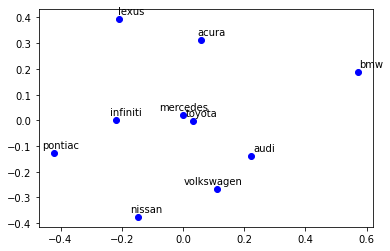

In [33]:
x= X_mds[:,0]
y= X_mds[:,1]

for i in range(len(x)):
    plt.scatter(x[i],y[i],c='blue')
    plt.annotate(
        brands_lift.index[i],
        xy = (x[i], y[i]), xytext = (25, 3),
        textcoords = 'offset points', ha = 'right', va = 'bottom')
plt.show()

## Task E: Insights from MDS plot and lift values

From the lift values calculated in task C, we can see that Toyota and Mercedes have a significantly high lift value. Based on this lift value we can infer that people associated Toyota with Mercedes during the year 2004 (Data is from the year 2004) which is a surprising discovery. Below are the few probable conclusions that can be inferred by this observation.

- People might want to pay less for the brand value and buy a luxury high end toyota car instead of paying for a basic model Mercedez brand.
- People who fancy having a luxury branded car in their garage while paying the price of a Toyota might have spoken about both these brands together.
- People might be comparing Toyota and Merc given the fact that these brands have high lift values with attributes like Performance

Mercedes also has a high lift value with Volkswagen which shows that Mercedes is being compared more to other non-luxury brands than other luxury brands like Bmw\
From the MDS map obtained in task D, we can see that Bmw is relatively far from all the brands which means that people are rarely comparing Bmw to other brands.


## Task F: Attributes lift values

In [41]:
attributes = ['performance','price','luxury','sport','speed']#,'pretty','torque','love','experience','reliability',\
              #'fast','quality','mileage','acceleration','expensive','premium','horsepower','powerful']

att_dict = {}

for i in range(len(attributes)):
    att_dict[attributes[i]] = lift(attributes[i], brand_list,df,'Text_clean',df_unique_freq)

att_lift = pd.DataFrame.from_dict(att_dict)
att_lift.index = brand_list
att_lift

,performance,price,luxury,sport,speed
bmw,1.607260,2.122459,1.560632,2.973729,2.189392
acura,1.972105,2.780842,2.089380,3.704575,3.313535
pontiac,1.892003,2.707282,1.618253,3.600572,3.097798
lexus,1.635498,2.460118,2.402780,3.358351,2.430686
toyota,4.028960,5.288177,4.498087,7.978273,6.602966
audi,1.694365,2.773142,2.027692,3.852082,2.923790
infiniti,1.760237,2.284770,1.910684,3.048422,2.385388
nissan,1.908712,2.065562,2.201056,2.194098,3.285062
volkswagen,1.828301,3.200584,3.013599,3.754255,4.138552
mercedes,3.433298,4.719165,5.413076,7.668393,5.809098


## Task G: Insights from Attributes lift values

The most talked about attributes seem to be:

1.	Performance
2.	Price
3.  Luxury
4.	Sport 
5.	Speed

Surprisingly, these attributes are highly associated with Toyota and there could be multiple reasons for such a high association. Sentiment analysis would give a clarity on whether such strong association is positive or negative but the following are our suggestions:

1.	Toyota seems to be associated the most with the word ‘Sport’. We believe that this is a negative association. In 2004, Toyota launched their second-generation Toyota Solara Camry which is ‘Sporty’ version of Toyota sedan. It had features like open roof and looked sleeker than the sedan. It was created to appeal to a demographic of more sport-minded drivers than those who prefer the Toyota Camry Sedan, the Camry Solara aspired to blend "sporty" looks and style with spacious practicality. But it wasn’t sporty enough and the sales of this model were disappointing as well. So, based on this information assuming negative sentiment we can suggest Toyota company to increase their marketing on the model and deep dive into the particular aspects of what would make its car model more sporty to its customers.

2. As mentioned above, in the entry level luxury market, attributes related to price and performance have more frequency than luxury. And since, we have established that sport is a term which is negatively associated with Toyota and is the most talked about attribute. We may conduct additional research on how to join the market with a brand positioning similar to Toyota with a high-performance vehicle in the sporty category. If a new entrant enters in the sporty segment as a value for money, they would be able to get customers from the share that goes to Toyota cars instead of Mercedes low end cars.

Though Toyota high-end car maybe compared to Mercedes low end cars, other key observations made are:

The attribute luxury is highest associated with Mercedes. That means that customer doesn’t have any dissonance with Mercedes. The customer knows Merc stands for luxury and premium. The brand image is intact in the customer’s mind. The customer just makes a compromise on the luxury aspect as they believe that Toyota could be giving better utility. Hence, terms like luxury, premium are not as important in the Entry Level Luxury market. 

Note: Surprisingly, BMW is associated the lowest with Luxury. BMW in 2004 had several issues such as Cooling system leaks, etc. This could be one of the reasons.


## Task H: Aspirational brands

#### Methodology:

- From the top 100 wordlist we selected the words and came up with bigrams which denote aspirational value. 
- Replaced such bigrams with a string 'aspiration_flag' and calculated lift values of that string with the top 10 brands

In [35]:
aspiration = ['love to', 'want to', 'dream of', 'hope to', 'like to', 'always wanted']

def replace_aspiration(x):
    for i in range(len(aspiration)):
        x = x.replace(aspiration[i],'aspiration_flag')       
    return x

df['Text_aspiration'] = df['Text'].map(replace_aspiration).map(remstopwords)
df

,Date,Text,Text_clean,Text_aspiration
0,January 2004,dont you think people see their car as project...,car projecting lot life disconnect philosophy ...,car projecting lot life disconnect philosophy ...
1,January 2004,i dont know about thatwe just all want the big...,thatwe biggest brag biggest baddest car paying...,thatwe biggest aspiration_flag brag biggest ba...
2,January 2004,way more than we are paying for entry lux seda...,paying entry lux sedan spent millionares truei...,paying entry lux sedans spent millionares true...
3,January 2004,one friend of mine owns 11 car dealerships and...,friend owns 11 car dealerships bank wealthy dr...,friend owns 11 car dealerships bank wealthy dr...
4,January 2004,it can go either way it goes all different w...,different ways time wanted bmw longest time fi...,different ways time wanted bmw longest time fi...
...,...,...,...,...
5045,August 2006,hmmm maybe its time for a poll questions 1 is...,hmmm time poll questions 1 lexus large regular...,hmmm time poll questions 1 lexus large regular...
5046,August 2006,ill start 1 no its too small 2 nope for a car...,start 1 small 2 camercedes offer optional manu...,start 1 small 2 car class offer optional manua...
5047,August 2006,yeah pat but only na and japan get the is350,pat japan lexus,pat japan is350
5048,August 2006,the camry aka es350 does not belong in this di...,toyota aka es350 belong discussion bmw fine,camry aka es350 belong discussion 3er fine


In [36]:
df_unique_freq_aspiration = unique_freq(df['Text_aspiration']).sort_values(by = 'count', ascending = False)
df_aspiration = pd.DataFrame(lift('aspiration_flag', brand_list,df,'Text_aspiration',df_unique_freq_aspiration), columns = ['aspiration lift'])
df_aspiration['brands'] = brand_list
df_aspiration.set_index('brands', inplace = True)
df_aspiration.T

brands,bmw,acura,pontiac,lexus,toyota,audi,infiniti,nissan,volkswagen,mercedes
aspiration lift,1.538967,1.653532,2.473736,1.901339,1.989017,1.7877,1.677015,1.654409,0.0,2.022583


## Business Insights based on Aspiration

The words used to describe aspiration of people towards the brands are: ‘Want to’, ‘Love to’, ‘Dream of’, ‘Hope to’, ‘Like to’ and ‘Always wanted’.

Most aspirational brand is potiac. Based on the lift values of brands with aspirational words, we can see that people are talking about Pontiac cars more aspirationally than the other brands which is surprising as, usually BMW, Mercedes and Audi are thought to be more desirable. Also, surprisingly we can see that Volkswagen has zero aspirational lift. By this Volkswagen as a luxury vehicle was not being desired by the people on the forum. Even Toyota has the third highest aspirational value which is surprising considering the company’s inclination towards economical vehicles.